# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k * 100.0 / n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

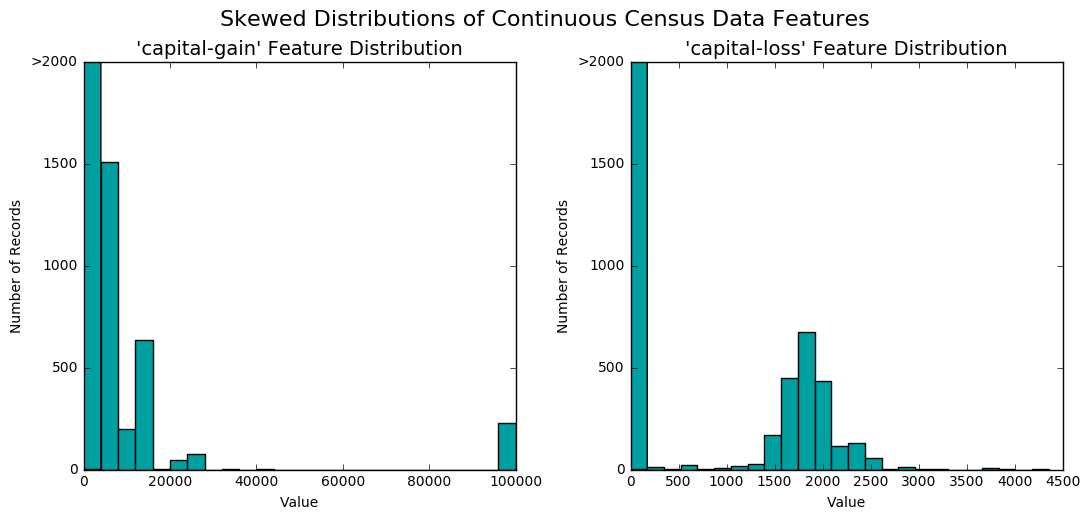

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

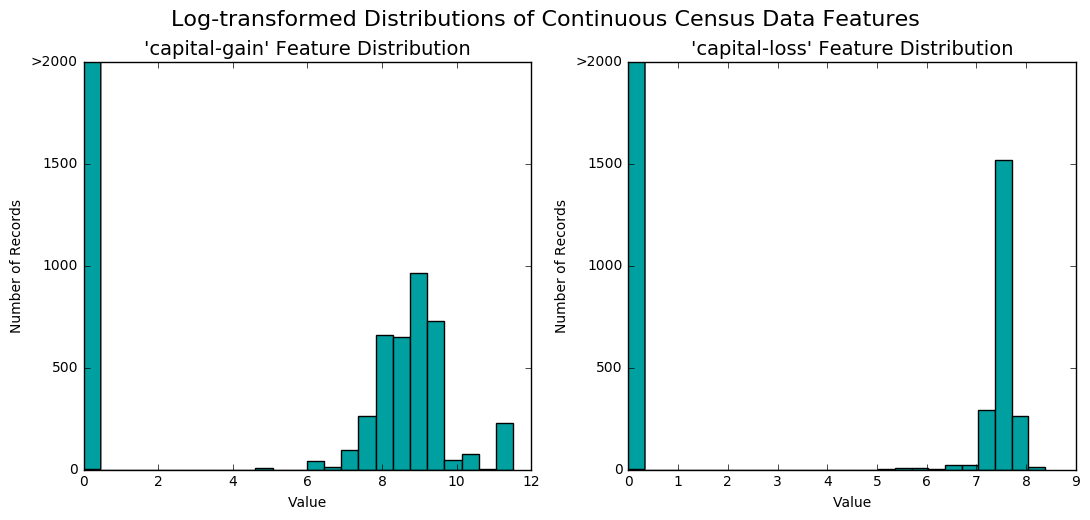

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

print income_raw.head(n=10)
# TODO: Encode the 'income_raw' data to numerical values
#income = income_raw.apply((lambda x: 0 if x['income']=='<=50K' else 1), axis=1)
income = [1 if x == '>50K' else 0 for x in income_raw]


# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded
#print income

display(features_raw.head(n = 1))



0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marit

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *UdacityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would is appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *UdacityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *UdacityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [8]:
#n_records = len(data)
#n_greater_50k = len(data[data['income'] == '>50K'])
#n_at_most_50k = len(data[data['income'] == '<=50K'])

tp = n_greater_50k
tn = 0
fp = n_at_most_50k
fn = 0

# TODO: Calculate accuracy
accuracy = (tp + tn) * 1.0 / n_records

precision = (tp) * 1.0 / max(1, (tp + fp))
recall = (tp) * 1.0 / max(1, (tp + fn))
beta = 0.5
print "accuracy:", accuracy, "precision:", precision, "recall:", recall
# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = ((1 + beta * beta) * precision * recall)/ max(1, (recall + (beta*beta*precision)))

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

accuracy: 0.247843969749 precision: 0.247843969749 recall: 1.0
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supverised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

Answer:
Naive Bayes is mainly suited for text based classification. So it might not do that well here. Also more useful when the number of features are large.

KNN may not be a good choise since the dataset is not very small. i.e. predicting is likely going to take time. So not considering this as well.

I believe any of the remaining 5 can be a reasonable choice. 

Since Decision Tree is easly to understand and since some of the features give us good information gain (education, marital-status, age (most of people younger than 20 make less than 50K)) I have a feeling that Decision Tree could do a good job here. So I will pick decision tree.

SGDC is suitable mainly for very large datasets. It also does not guarantee a convergence. I think LR or SVM might do better than SGDC in this case since the number of samples are not that big. So elliminating SGDC.

Ensemble method should do better. But not picking it since it seem to be more complex than SVM and LR.

So I am picking DecisionTree, SVM and LR.

DECISION Tree:
**************
Application: Classifying patients by disease, Equipment Malfunction by cause, classifying loan applicants by their chance to default (Reference: Machine Learning - Tom Mitchell)

Strengths: Easy to understand the model. Works even if some attributes are missing in the training. Robust to errors in the training sample. Prediction is fast. Performs well on large datasets. If features provide good information gain, this will give good models.

Weakness: Tendency to overfit. May not work that well for regression problems. Tree generation algorithm in NP-Complete. May not do well for small training size.

Data Observations: 
    People less than 20 make less than 50K
    People who work less and about 30 hours make less than 50K
    People with less than 10th st education make less than 50K
    Most people with more than 10K capital gain make more than 50K
    People with relationship values other than wife and husband prodominantly make less than 50K. Marital-status is very much correlated to this.
    Higher proportion of females make less than 50K
These features help separate people who make less and 50K and greater than 50K. If DT can learn them (which it should) it should be able to do a good prediction.

SVM:
****
Applications: Text and hypertext classification, classification of images, hand written character recognition (https://en.wikipedia.org/wiki/Support_vector_machine)

Strengths: No local optima. Can work well in higher dimentional space. Tradeoff between classifier complexity and error
can be controlled explicitly. Training is faster compared to NN.

Weakness: May not be good for very large datasets (> 100k). Works good for binary classification. Multiclass can be done using one VS Rest and doing it equal to to n-1 times where N is the number of categories. It is difficult to interpret the model. Requires feature scaling. May not work well if number if features is more than number of training samples. Need a good kernel to work.

Number of training data is within the rangle SVM can handle. This is a binary classification problem and SVM is good at it. Hence SVM should be a decent choice.

LOGISTIC REGRESSION
*******************
Applications: To determine likelihood of a homeowner defaulting on a mortgage. To predict whether a person will vote Republican or Democrat. https://en.wikipedia.org/wiki/Logistic_regression

Strengths: Easy to interpret the data. Well researched and many libraries available for this.

Weakness: Can be used only for Classification. Need more data to train.

SVM and LR and more or less similar and applies to similar class for problems. If SVM do a good job for a problem, LR also should be able to do a decent job. LR need large number of data to train. Since we are 50K samples, it should be enough to train LR.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Dependent on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


C:\Users\arun\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
{'DecisionTreeClassifier': {0: {'acc_test': 0.76196793808734109,
                                'acc_train': 1.0,
                                'f_test': 0.52240032881216603,
                                'f_train': 1.0,
                                'pred_time': 0.009999990463256836,
                                'train_time': 0.00599980354309082},
                            1: {'acc_test': 0.80331674958540633,
                                'acc_train': 0.9966666666666667,
                                'f_test': 0.5971146139460326,
                                'f_train': 0.99719101123595499,
                                'pred_time': 0.010999917984008789,
                                'train_time': 0.07899999618530273},
                 

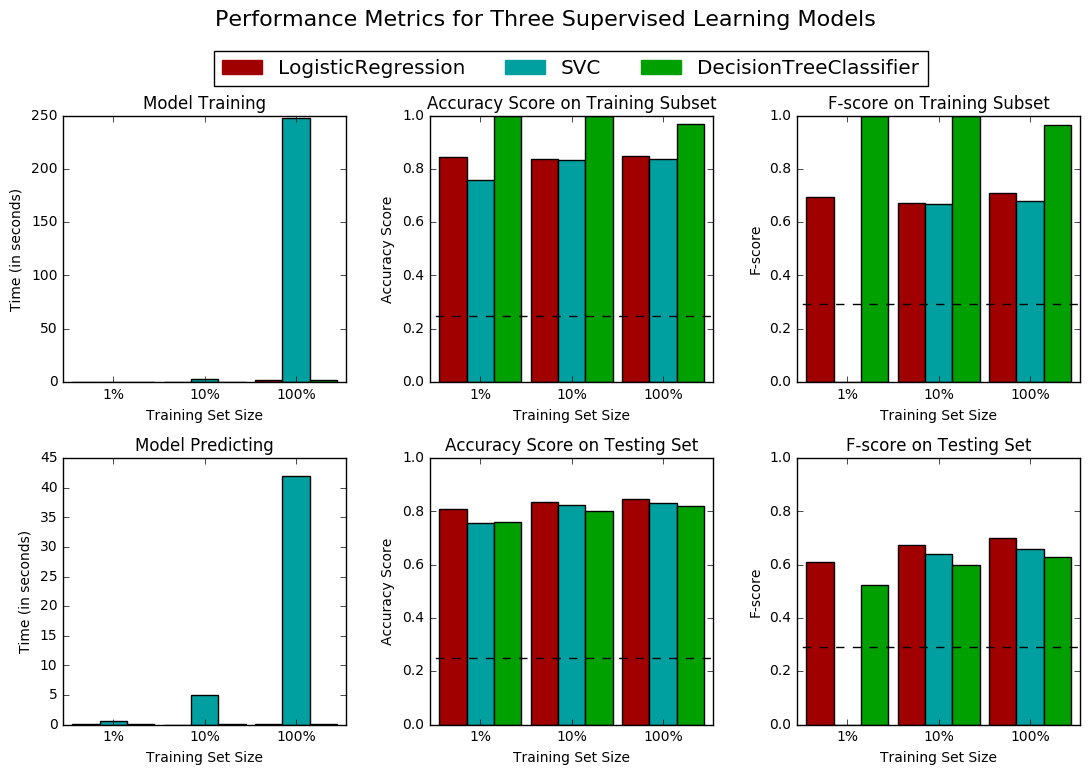

In [10]:
# TODO: Import the three supervised learning models from sklearn

# TODO: Initialize the three models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
import pprint as pp

clf_A = LogisticRegression(random_state=7)
clf_B = svm.SVC(random_state=7)
clf_C = tree.DecisionTreeClassifier(random_state=7)

sCount = X_train.shape[0]
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = sCount/100
samples_10 = sCount/10
samples_100 = sCount

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
#for clf in [clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
#    for i, samples in enumerate([samples_1]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

pp.pprint(results)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

Answer: For SVM the training and prediction time is much higher compared to others. I would argue that training time of 5 minutes is OK in this case since this is a one time step.Also, eventhough the prediction time looks high, it comes to around 2 milliseconds per item, which is also acceptable to me in this case (This may not be acceptable in all cases though). Also it is noticed that the model evaluation scores did not increase much once we moved from 10% to 100%. This points to a high bias classifier. It can be argued that we did not use the full power of SVM since there are lots of knobs to tune from and we went with the default. So it is very much possible that there could be some kernel/parameter which could give a better SVM model. But given that the training time is high it would be hard to tune it (for e.g. using GridSearchCV). So I am ruling out SVM based on the training time beeing too high. 

DT did very well on the training but not that well on test. So this is definitely overfitting. This also means that there is potential to increase the score if we avoid overfitting.

LogisticRegression actually did better for both Accuracy and FScore than DT. I think apart from adding more data, there is not much tuning we can do with LR.

Given that LR has limited scope for tuning (other than adding more data) and there is scope for improvement in DT (if we can avoid overfitting), I think DT is more apporpriate for this problem.

REVIEW RESPONSE:
****************
Reviwer suggested that LR should be the one to pick. I had picked DT instead. Reason for that is the the scores for LR are more or less same for training and test data sets, meaning there is not much scope for improvement. But for DT the scores are substantially higher for training set. This obviously means overfitting, but also means that there is scope for improvemnt for test set score. That was the rationale behind picking DT over LR. To be sure, I tried LR as well and infact DT has better scores than LR. I still do not find any flaw in my reasoning. It is also reinforced by the result of the experiment on LR. So I do not want to change my response. I am willing to change my mind if a valid reasoning is given.

In real life I would have tried both models. But given that I had to pick one out of three, I would still pick DT.

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

Answer: Decision tree tries to learn a sequence of questions it can ask to find out whether a given person makes more than 50K, based on the persons feature (like age, education etc.). It tries to generate these sequence of questions such that on average it can determine where a person makes more than 50K with minimum number of questions. It "learns" this sequence of questions based on the data it is given while "training". Once the model is chosen it is possible to see the "tree" of questions it generates and we can get an intuitive understanding of the model.

Logistic regression tries to find a model which tries to find the probability (likelihood) of a person making more than 50K, given the features. If the person is more likely to make more than 50K, the person is reported as making more than 50K. It picks the model in such a way that the error rate on the training set is minimised. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [12]:
from sklearn import grid_search
import numpy as np
from sklearn import tree

from sklearn.metrics import fbeta_score, make_scorer

# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state=7)

# TODO: Create the parameters list you wish to tune
parameters = {'max_depth': range(3, 50, 2), 'min_samples_split': range(2, 25, 2)}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = grid_search.GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "DT: Unoptimized model\n------"
print "DT: Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "DT: F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "DT: \nOptimized Model\n------"
print "DT: Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "DT: Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

DT: Unoptimized model
------
DT: Accuracy score on testing data: 0.8189
DT: F-score on testing data: 0.6287
DT: 
Optimized Model
------
DT: Final accuracy score on the testing data: 0.8547
DT: Final F-score on the testing data: 0.7206


In [11]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn import grid_search
import numpy as np
from sklearn import tree

from sklearn.metrics import fbeta_score, make_scorer

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=7, n_jobs=-1)

# TODO: Create the parameters list you wish to tune
#parameters = {'max_depth': range(3, 50, 2), 'min_samples_split': range(2, 25, 2)}
parameters = { 'C' : range(1,10), 'max_iter' : range(100, 1100, 100), 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = grid_search.GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

C:\Users\arun\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8483
F-score on testing data: 0.6993

Optimized Model
------
Final accuracy score on the testing data: 0.8496
Final F-score on the testing data: 0.7015


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model    | Optimized Model        |
| :------------: | :-----------------: | :------------------: | :--------------------: | 
| Accuracy Score | 0.2478              |0.8189(DT),0.8483(LR) | 0.8547(DT), 0.8496(LR) |
| F-score        | 0.2917              |0.6286(DT),0.6993(LR) | 0.7206(DT), 0.7015(LR) |


Answer: Yes the scores for optimized model is better than unoptimized model. Both accuracy and F-scores are better for optimized model for both LR and DT.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them?_

Answer: Capital-Gain, relationship/marital-status, education-num/education_level, sex, age in the order of their rank.

Relationship and marital-status are both good. But both seem to be correlated. So should take only only. Same for education-num and education-level. Education-num seem to be a better feature.

Capital-Gain is a good feature since it help us separate out about 10% of all the people who make more than 50k. Other features seem to separate out people who make less than 50K.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

[  1.64499294e-01   1.30091934e-01   1.20661732e-01   4.49145095e-02
   9.09132694e-02   6.82478587e-03   8.61093622e-03   1.37741342e-02
   7.06091325e-03   9.95114540e-03   6.36994433e-03   1.17477249e-04
   3.88248123e-04   7.83090413e-04   2.97533435e-04   1.36580957e-04
   4.89422356e-04   6.09920682e-04   7.06692905e-04   2.52842708e-03
   3.21505838e-03   2.57235534e-03   5.12411355e-04   8.58362044e-04
   3.70171934e-03   0.00000000e+00   7.62482410e-04   3.83609223e-03
   3.42182074e-03   1.67064346e-04   2.19621406e-01   1.15872455e-03
   3.02348022e-03   1.47132252e-03   1.43578444e-03   4.87547770e-03
   0.00000000e+00   8.88922375e-03   1.22415599e-02   3.77573923e-03
   3.61213492e-03   5.30181631e-03   4.71835125e-03   2.22192928e-04
   8.15251964e-03   3.30106645e-03   8.71987611e-03   5.27502859e-03
   5.60714949e-03   3.92063420e-03   2.49458606e-03   1.06720877e-03
   1.40838587e-03   1.88262401e-03   3.28011053e-03   1.18115078e-03
   3.13545187e-03   5.54942505e-03

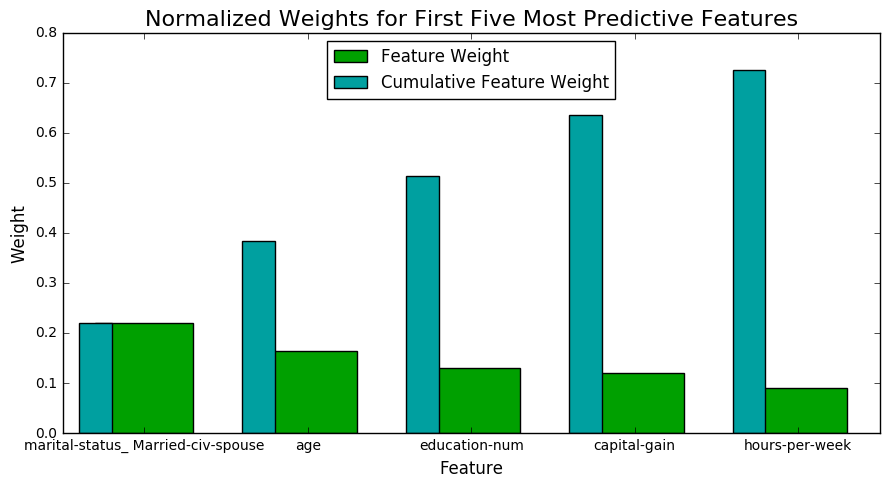

In [19]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
# TODO: Train the supervised model on the training set 
model = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)

# TODO: Extract the feature importances
importances = clf.feature_importances_

print clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

Answer: I got 4 out of 5 correct. I picked sex instead of hours-per-week since most women made <50K. But there is a positive correlation b/w hours-per-week and income. But I had picked sex over this since there were more number of people I could separate using sex feature. But my intution was wrong.

About the order of importance of the features, I had given capital-gain a higher importance since that was the only feature which could separate out people who made more than 50K. But the number of those were low (~1500-2000 out of the about 13K). So may be that played a role there.

Clearly there was a correlation b/w age and income. But only "clear" separation was there only for initial ages. Hence was given lower importance. 

But overall I am happy with my picks.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8547
F-score on testing data: 0.7206

Final Model trained on reduced data
------
Accuracy on testing data: 0.8439
F-score on testing data: 0.6835


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

Answer:Both accuracy and f-score went down after reducing the number of features. I have a feeling that if we have included a few more important fature it could have gone higher.

Yes, I would consider using reduced number of feature if training tiem was a factor.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.